**NAMA               : MUHAMMAD NAFISH ZALDINANDA**

No. Registrasi : 1494037162101-1859

Program             : Fresh Graduate Academy Digital Talent Scholarship 2022 | Machine Learning Developer

Modul :  Time Series



---

Proyek Akhir Membuat Model Machine Learning dengan Data Time Series :


1.   Dataset yang dipakai sebagai berikut : https://archive.ics.uci.edu/ml/datasets/Room+Occupancy+Estimation
1.   Dataset harus dibagi menjadi train set dan Validation set sebesar 20% dari total dataset.
3.   Dataset yang akan dipakai bebas, namun minimal memiliki 1000 sampel.
4.   Harus menggunakan LSTM dalam arsitektur model.
5.   Model harus menggunakan model sequential.
6.   Harus menggunakan Learning Rate pada Optimizer.
7.   Program dikerjakan pada Google Colaboratory.
8.   MAE < 10% skala data.


In [1]:
#Library yang Digunakan Pada Model Ini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Dense, LSTM
import tensorflow as tf
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#Import Dataset dengan format CSV ke Dataframe Pandas
df = pd.read_csv("/content/drive/My Drive/dataset/Occupancy_Estimation.csv")
df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


In [4]:
#Mengambil Data Hanya Pada Kolom Time dan S1_Temp dengan fungsi .iloc[]
df = df.iloc[:, 1:3] 
df

,Time,S1_Temp
0,10:49:41,24.94
1,10:50:12,24.94
2,10:50:42,25.00
3,10:51:13,25.00
4,10:51:44,25.00
...,...,...
10124,08:58:07,25.06
10125,08:58:37,25.06
10126,08:59:08,25.13
10127,08:59:39,25.13


In [5]:
#Mengambil Nilai/Value yang terdapat pada kolom Time dan S1_Temp dengan fungsi .values
time = df['Time'].values
temp  = df['S1_Temp'].values

Text(0.5, 1.0, 'Data Time Series Temperature')

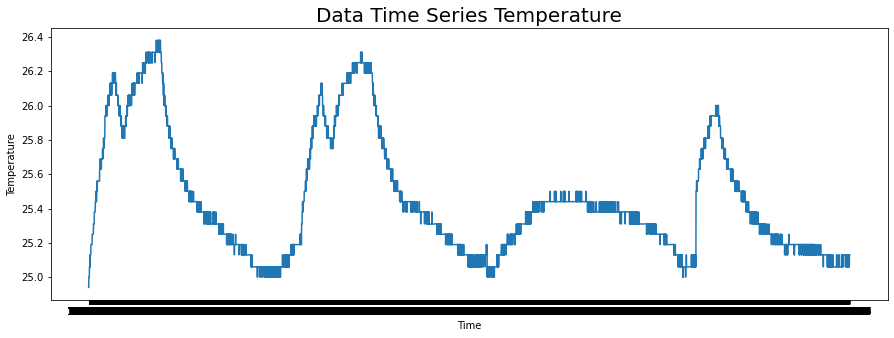

In [6]:
#Membuat Plot Data Time Series pada Sensor Temperature 1 (S1_Temp) berdasarkan Waktu (Time) 
plt.figure(figsize=(15,5))
plt.plot(time, temp)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Data Time Series Temperature', fontsize=20)

In [7]:
#Mereshape Value S1_Temp menjadi 2D Array 
temperature = df['S1_Temp'].values.reshape(-1,1)
temperature

array([[24.94],
       [24.94],
       [25.  ],
       ...,
       [25.13],
       [25.13],
       [25.13]])

In [8]:
#Melakukan Pre-Processing Min Max Scaller pada nilai kolom S1_Temp
from sklearn import preprocessing
preprocessor_temperature = preprocessing.MinMaxScaler(feature_range=(0, 1))
temperature_pre = preprocessor_temperature.fit_transform(temperature)
temperature_pre

array([[0.        ],
       [0.        ],
       [0.04166667],
       ...,
       [0.13194444],
       [0.13194444],
       [0.13194444]])

In [9]:
#Menghapus Kolom S1_Temp yang Lama
df.drop(columns=['S1_Temp'], inplace=True)

In [10]:
#Membuat Kolom S1_Temp pada Dataframe
df_temp = pd.DataFrame(temperature_pre, columns = ['S1_Temp'])
df_temp

,S1_Temp
0,0.000000
1,0.000000
2,0.041667
3,0.041667
4,0.041667
...,...
10124,0.083333
10125,0.083333
10126,0.131944
10127,0.131944


In [11]:
#Menggabungkan Dataframe yang lama menjadi Dataframe yang baru
df_new = pd.merge(df, df_temp, left_index=True, right_index=True)
df_new

,Time,S1_Temp
0,10:49:41,0.000000
1,10:50:12,0.000000
2,10:50:42,0.041667
3,10:51:13,0.041667
4,10:51:44,0.041667
...,...,...
10124,08:58:07,0.083333
10125,08:58:37,0.083333
10126,08:59:08,0.131944
10127,08:59:39,0.131944


In [12]:
#Mengambil Nilai/Value pada Kolom Dataframe 'Time' dan 'S1_Temp'
waktu = df_new['Time'].values
suhu  = df_new['S1_Temp'].values

In [13]:
#Split Data Training (80%) dan Data Latih/Validation (20%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(waktu, suhu, test_size = 0.2, random_state = 0, shuffle=False)
print(len(x_train), len(x_test))

8103 2026


In [14]:
#Fungsi Windowed Dataset
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [15]:
#Implementasi Windowed Dataset pada Label/Target Data
train_label_dataset = windowed_dataset(y_train, window_size=60, batch_size=100, shuffle_buffer=1000)
test_label_dataset = windowed_dataset(y_test, window_size=60, batch_size=100, shuffle_buffer=1000)

In [16]:
#Arsitektur Model dengan Menggunakan LSTM
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [17]:
#Penerapan Learning Rate pada Optimizer
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
#Model Compile dengan Loss Function Huber, Optimizer SGD, dan Metrics Mean Absolute Error
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [18]:
#Menggunakan Fungsi Callback untuk Batasan pada Saat Pelatihan Model
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae') < 0.1 and logs.get('val_mae') < 0.1): #Pelatihan Model akan Berhenti ketika mae dan val_mae < 0.10 atau 10% skala data
      self.model.stop_training = True
      
stopTraining = Callback()

In [19]:
history = model.fit(train_label_dataset, epochs=150, validation_data=test_label_dataset, callbacks = [stopTraining])

Epoch 1/150
81/81 [==============================] - 11s 94ms/step - loss: 0.0900 - mae: 0.3363 - val_loss: 0.0387 - val_mae: 0.2158
Epoch 2/150
81/81 [==============================] - 6s 72ms/step - loss: 0.0693 - mae: 0.2803 - val_loss: 0.0289 - val_mae: 0.1722
Epoch 3/150
81/81 [==============================] - 6s 71ms/step - loss: 0.0567 - mae: 0.2443 - val_loss: 0.0227 - val_mae: 0.1424
Epoch 4/150
81/81 [==============================] - 6s 70ms/step - loss: 0.0478 - mae: 0.2191 - val_loss: 0.0187 - val_mae: 0.1272
Epoch 5/150
81/81 [==============================] - 6s 72ms/step - loss: 0.0413 - mae: 0.2016 - val_loss: 0.0161 - val_mae: 0.1253
Epoch 6/150
81/81 [==============================] - 6s 71ms/step - loss: 0.0366 - mae: 0.1893 - val_loss: 0.0145 - val_mae: 0.1261
Epoch 7/150
81/81 [==============================] - 6s 71ms/step - loss: 0.0331 - mae: 0.1805 - val_loss: 0.0136 - val_mae: 0.1285
Epoch 8/150
81/81 [==============================] - 7s 84ms/step - loss: 0

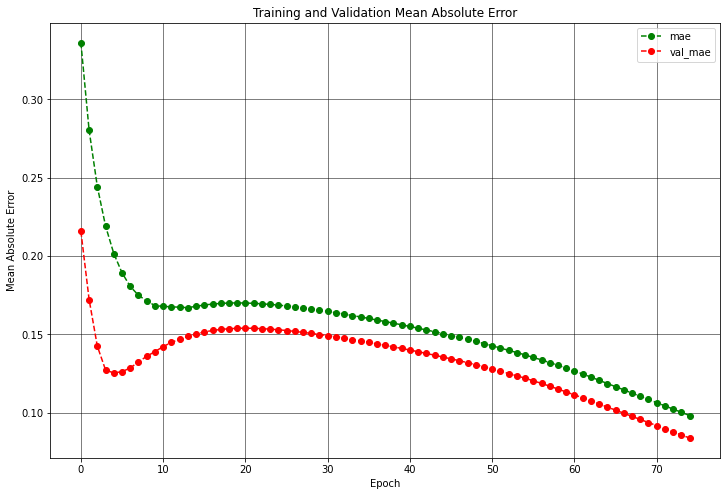

In [20]:
#Visualisasi Training dan Validation Mean Absolute Error pada Setiap Epoch
plt.figure(figsize = (12,8))
plt.title("Training and Validation Mean Absolute Error")
plt.plot(history.history['mae'],'go--')
plt.plot(history.history['val_mae'],'ro--')
plt.legend(['mae','val_mae'])
plt.grid(color ='k', linewidth = 0.5)
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.show()

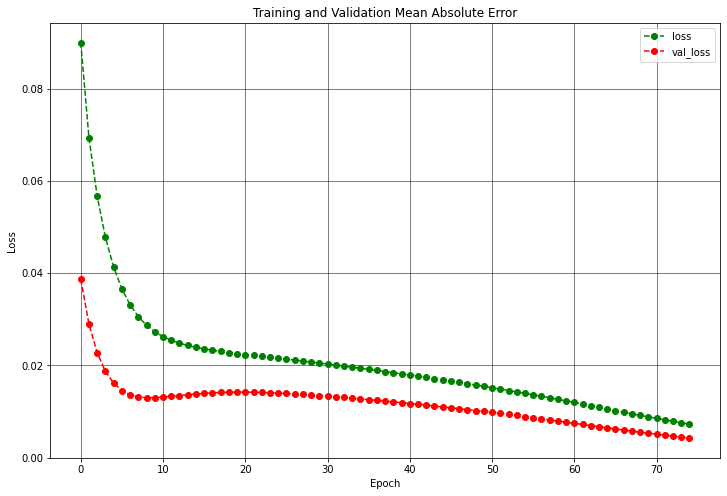

In [21]:
#Visualisasi Training dan Validation Loss pada Setiap Epoch
plt.figure(figsize = (12,8))
plt.title("Training and Validation Mean Absolute Error")
plt.plot(history.history['loss'],'go--')
plt.plot(history.history['val_loss'],'ro--')
plt.legend(['loss','val_loss'])
plt.grid(color ='k', linewidth = 0.5)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()